> #                               Lumber Spine Degenerative Classification

In [258]:
import pandas as pd
import numpy as np
import pydicom
import os
import glob

In [259]:
# Includes the information of the diseases/conditions of patients at different levels of Lumber Spine.

base_data=pd.read_csv("/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv")
base_data.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [260]:
print(base_data.info())
print("-----------------------------------------------")
base_data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1974 non-null   object
 2   spinal_canal_stenosis_l2_l3             1974 non-null   object
 3   spinal_canal_stenosis_l3_l4             1974 non-null   object
 4   spinal_canal_stenosis_l4_l5             1974 non-null   object
 5   spinal_canal_stenosis_l5_s1             1974 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1973 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1973 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1973 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1973 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1973 non-null   object
 11  righ

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
count,1.975000e+03,1974,1974,1974,1974,1974,1973,1973,1973,1973,...,1811,1893,1972,1972,1964,1814,1893,1973,1973,1968
unique,NaN,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
freq,NaN,1886,1770,1622,1482,1904,1908,1791,1522,1204,...,1690,1555,1324,887,1408,1680,1577,1322,891,1399
mean,2.160989e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.236621e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.003253e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.094775e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.197997e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.221041e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling null values in Categorical variables of base_data with mode

In [261]:
for col in base_data.columns[1:]:
    if base_data[col].isnull().any():  # Check if the column has null values
        mode_value = base_data[col].mode()[0]  
        base_data.fillna({col: mode_value}, inplace=True)

base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1975 non-null   object
 2   spinal_canal_stenosis_l2_l3             1975 non-null   object
 3   spinal_canal_stenosis_l3_l4             1975 non-null   object
 4   spinal_canal_stenosis_l4_l5             1975 non-null   object
 5   spinal_canal_stenosis_l5_s1             1975 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1975 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1975 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1975 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1975 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1975 non-null   object
 11  righ

In [262]:
# Includes the description of training data. Conditions at each level of disk for every study_id and series_id and, 'x' and 'y' co-ordinate for the damaged area

label_data=pd.read_csv("/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv")
label_data.head()



,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [263]:
print(label_data.info())
print("-----------------------------------------------")
label_data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48692 entries, 0 to 48691
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   study_id         48692 non-null  int64  
 1   series_id        48692 non-null  int64  
 2   instance_number  48692 non-null  int64  
 3   condition        48692 non-null  object 
 4   level            48692 non-null  object 
 5   x                48692 non-null  float64
 6   y                48692 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.6+ MB
None
-----------------------------------------------


,study_id,series_id,instance_number,condition,level,x,y
count,4.869200e+04,4.869200e+04,48692.000000,48692,48692,48692.000000,48692.000000
unique,NaN,NaN,NaN,5,5,NaN,NaN
top,NaN,NaN,NaN,Left Neural Foraminal Narrowing,L3/L4,NaN,NaN
freq,NaN,NaN,NaN,9860,9858,NaN,NaN
mean,2.160244e+09,2.154461e+09,13.409677,NaN,NaN,238.237527,233.070212
std,1.237310e+09,1.244319e+09,56.585031,NaN,NaN,73.226429,92.480334
min,4.003253e+06,1.099600e+04,1.000000,NaN,NaN,4.058824,2.063098
25%,1.093392e+09,1.069855e+09,7.000000,NaN,NaN,179.068100,164.740474
50%,2.196441e+09,2.163803e+09,11.000000,NaN,NaN,234.836173,219.125160
75%,3.225352e+09,3.242314e+09,15.000000,NaN,NaN,282.732743,289.759563


In [264]:
def find_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    print(f"Unique values in '{column_name}' column:")
    print(unique_values)
    print("-----------------------------")

In [265]:
find_unique_values(label_data, 'condition')
find_unique_values(label_data, 'level')


Unique values in 'condition' column:
['Spinal Canal Stenosis' 'Right Neural Foraminal Narrowing'
 'Left Neural Foraminal Narrowing' 'Left Subarticular Stenosis'
 'Right Subarticular Stenosis']
-----------------------------
Unique values in 'level' column:
['L1/L2' 'L2/L3' 'L3/L4' 'L4/L5' 'L5/S1']
-----------------------------


In [266]:
# Description of study and types of MRI images (series dscription)

desc_data=pd.read_csv("/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_series_descriptions.csv")
desc_data.head()

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


In [267]:
find_unique_values(desc_data, 'series_description')

Unique values in 'series_description' column:
['Sagittal T2/STIR' 'Sagittal T1' 'Axial T2']
-----------------------------


In [268]:
test_desc=pd.read_csv("/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/test_series_descriptions.csv")
test_desc.head()

,study_id,series_id,series_description
0,44036939,2828203845,Sagittal T1
1,44036939,3481971518,Axial T2
2,44036939,3844393089,Sagittal T2/STIR


In [269]:
# Merged dataframe of base_data(train.csv), label_data(train_label_coordinates.csv) 

merged_data = pd.merge(base_data, label_data, on='study_id')
merged_data.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_id,instance_number,condition,level,x,y
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [270]:
print(merged_data.info())
print("------------------------------------------------------")
merged_data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48692 entries, 0 to 48691
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   study_id                                48692 non-null  int64  
 1   spinal_canal_stenosis_l1_l2             48692 non-null  object 
 2   spinal_canal_stenosis_l2_l3             48692 non-null  object 
 3   spinal_canal_stenosis_l3_l4             48692 non-null  object 
 4   spinal_canal_stenosis_l4_l5             48692 non-null  object 
 5   spinal_canal_stenosis_l5_s1             48692 non-null  object 
 6   left_neural_foraminal_narrowing_l1_l2   48692 non-null  object 
 7   left_neural_foraminal_narrowing_l2_l3   48692 non-null  object 
 8   left_neural_foraminal_narrowing_l3_l4   48692 non-null  object 
 9   left_neural_foraminal_narrowing_l4_l5   48692 non-null  object 
 10  left_neural_foraminal_narrowing_l5_s1   48692 non-null  ob

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_id,instance_number,condition,level,x,y
count,4.869200e+04,48692,48692,48692,48692,48692,48692,48692,48692,48692,...,48692,48692,48692,48692,4.869200e+04,48692.000000,48692,48692,48692.000000,48692.000000
unique,NaN,3,3,3,3,3,3,3,3,3,...,3,3,3,3,NaN,NaN,5,5,NaN,NaN
top,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,NaN,NaN,Left Neural Foraminal Narrowing,L3/L4,NaN,NaN
freq,NaN,46513,43639,40042,36598,46961,47070,44198,37588,29807,...,40874,32667,22076,34629,NaN,NaN,9860,9858,NaN,NaN
mean,2.160244e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.154461e+09,13.409677,NaN,NaN,238.237527,233.070212
std,1.237310e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.244319e+09,56.585031,NaN,NaN,73.226429,92.480334
min,4.003253e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.099600e+04,1.000000,NaN,NaN,4.058824,2.063098
25%,1.093392e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.069855e+09,7.000000,NaN,NaN,179.068100,164.740474
50%,2.196441e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.163803e+09,11.000000,NaN,NaN,234.836173,219.125160
75%,3.225352e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.242314e+09,15.000000,NaN,NaN,282.732743,289.759563


# Visualizations 1

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

## Pie-Charts and Barplots for important categorical variables 

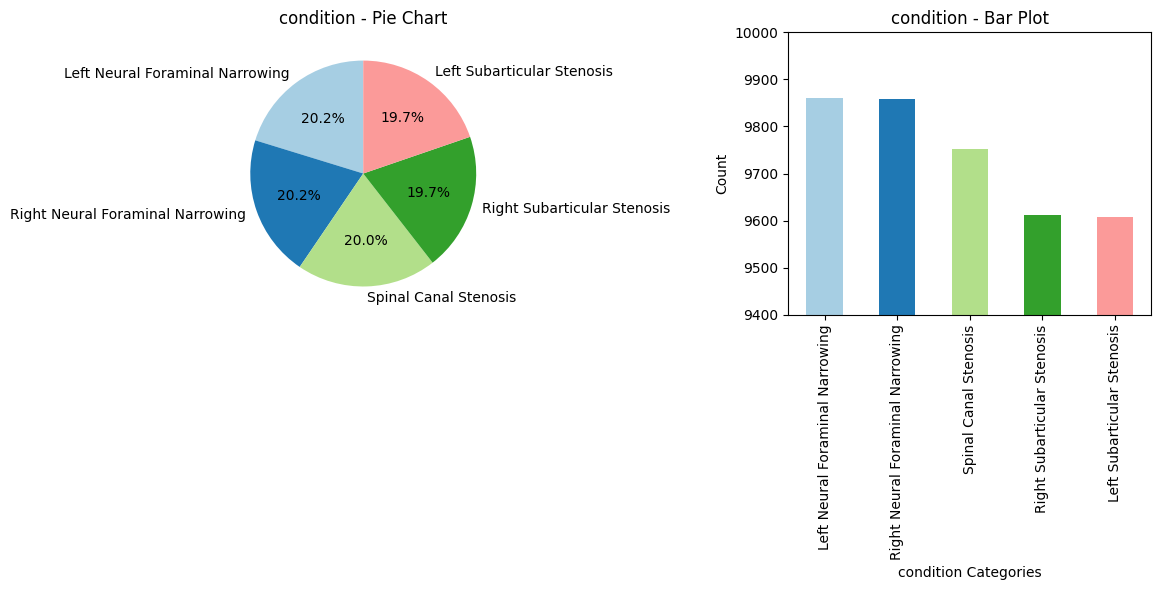

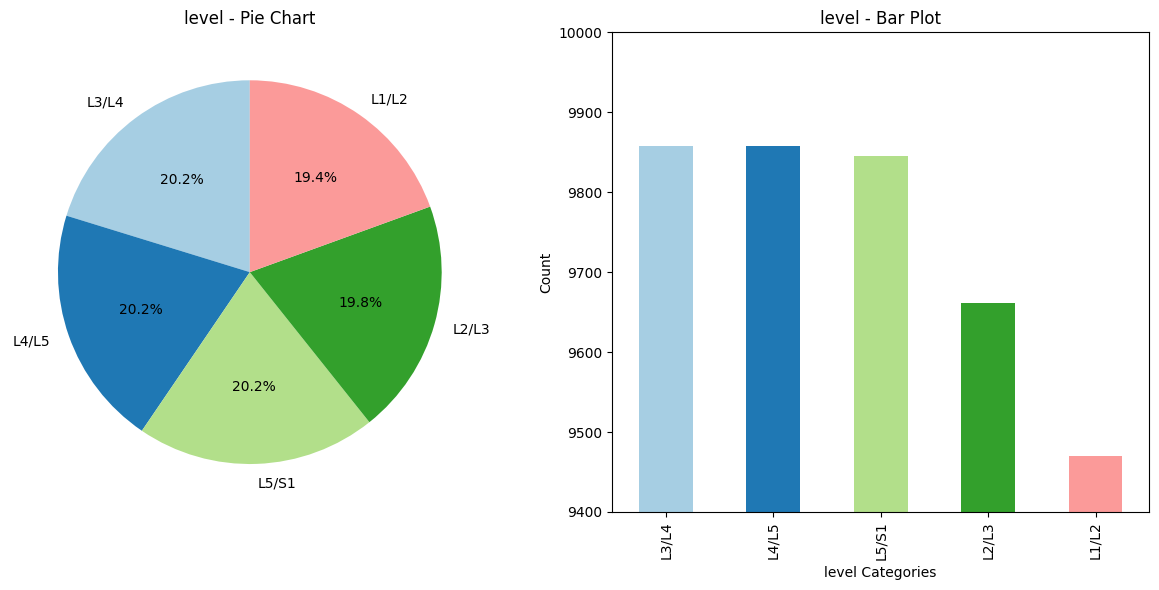

In [272]:
def create_pie_and_bar(df,a,b):
    # Identify columns with 'object' data type (categorical)
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    
    for col in categorical_columns:
        value_counts = df[col].value_counts()

        
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Pie chart
        value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0], colors=plt.cm.Paired.colors)
        axes[0].set_title(f'{col} - Pie Chart')
        axes[0].set_ylabel('') 

        # Bar plot with customized y-axis limits
        value_counts.plot(kind='bar', ax=axes[1], color=plt.cm.Paired.colors)
        axes[1].set_title(f'{col} - Bar Plot')
        axes[1].set_ylabel('Count')
        axes[1].set_xlabel(f'{col} Categories')

        # Set the y-axis range
        axes[1].set_ylim(a, b)

        
        plt.tight_layout()
        plt.show()


create_pie_and_bar(label_data,9400,10000)

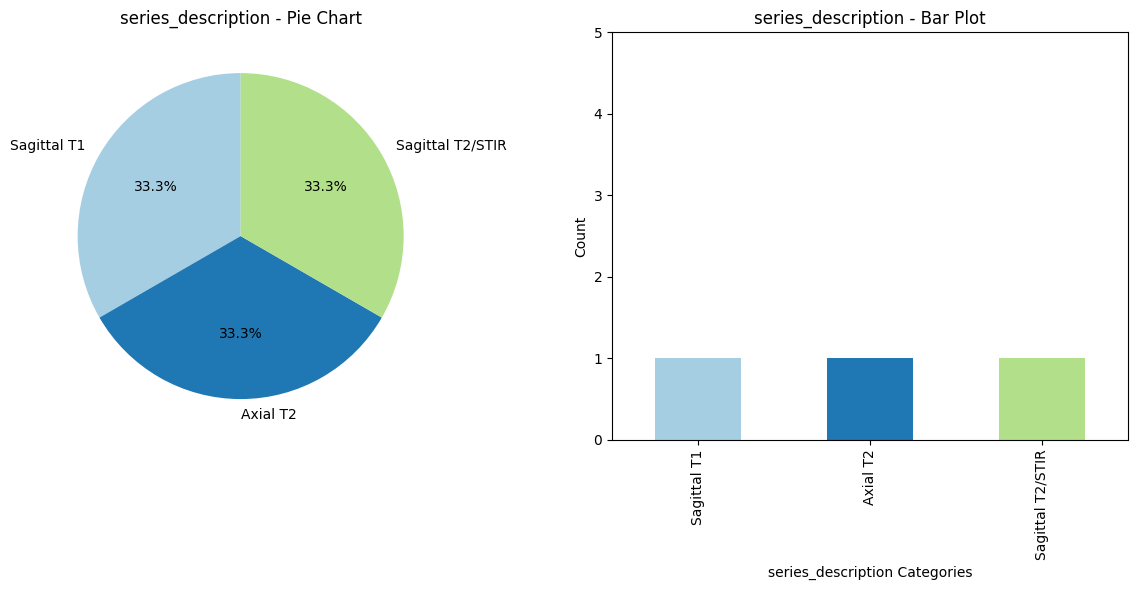

In [273]:
create_pie_and_bar(test_desc,0,5)

## Hexbin like Histogram for 'x' and 'y' variables in label_data

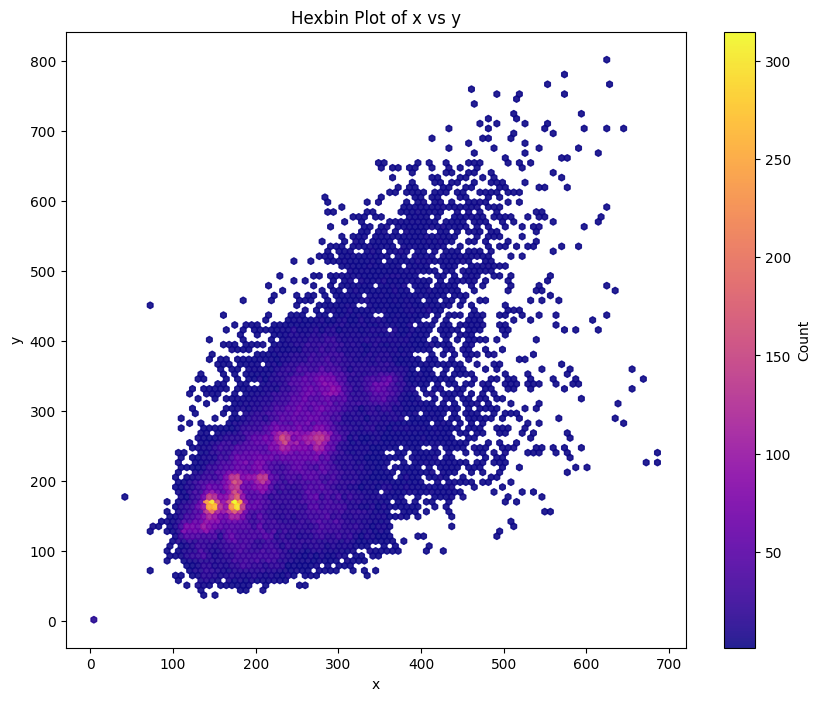

In [274]:
def create_hexbin_plot(df, x, y, gridsize=100, cmap='plasma',alpha=0.9):
    
    plt.figure(figsize=(10, 8))
    plt.hexbin(df[x], df[y], gridsize=gridsize, cmap=cmap, mincnt=1,alpha=alpha)
    
    plt.colorbar(label='Count')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Hexbin Plot of {x} vs {y}')
    
    plt.show()

create_hexbin_plot(label_data, 'x', 'y')


## HeatMap and PairPlot for Correlation of Numerical Variables using Merged Dataframe (base+label)

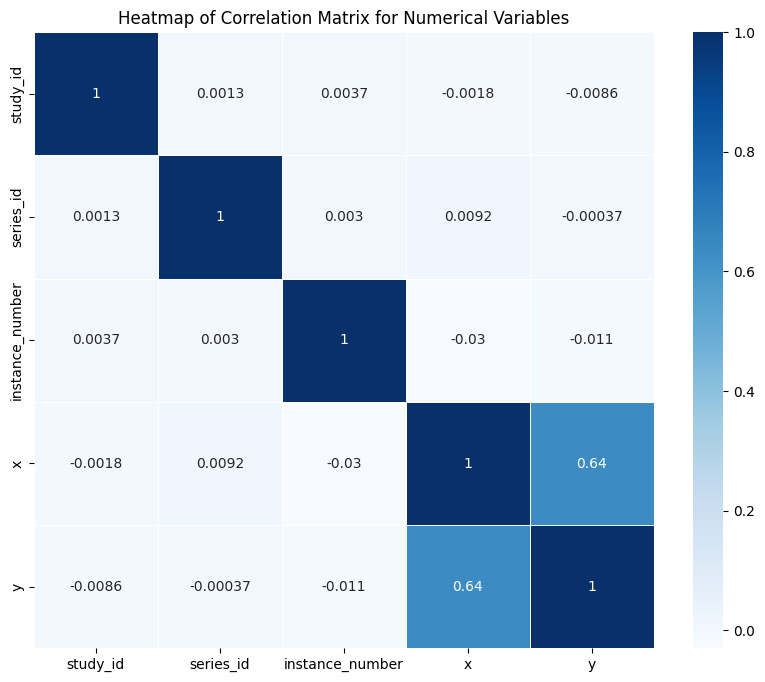

In [275]:
def create_heatmap_and_pairplot(df):
    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Identify numerical columns (int64 and float64 types)
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    plt.figure(figsize=(10, 8))
    corr_matrix = df[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)  
    
    plt.title('Heatmap of Correlation Matrix for Numerical Variables')
    plt.show()

    

create_heatmap_and_pairplot(merged_data)

# Preprocessing

## Converting categorical variables to numerical using LabelEncoder

In [276]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    label_encoders = {}
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str)) 
        label_encoders[col] = le 
    
    return df

base_data = label_encoding(base_data)
label_data=label_encoding(label_data)
desc_data=label_encoding(desc_data)


In [277]:
base_data.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,1,1,1,1,1,1,1,1,0,...,1,1,1,0,1,1,1,1,1,1
1,4646740,1,1,0,2,1,1,1,1,0,...,1,1,1,2,1,1,0,0,0,1
2,7143189,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,8785691,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
4,10728036,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [278]:
label_data.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,4,0,322.831858,227.964602
1,4003253,702807833,8,4,1,320.571429,295.714286
2,4003253,702807833,8,4,2,323.030303,371.818182
3,4003253,702807833,8,4,3,335.292035,427.327434
4,4003253,702807833,8,4,4,353.415929,483.964602


In [279]:
desc_data.head()

,study_id,series_id,series_description
0,4003253,702807833,2
1,4003253,1054713880,1
2,4003253,2448190387,0
3,4646740,3201256954,0
4,4646740,3486248476,1


# Visualizations 2

## KDE plots shwoing severity (Normal,Moderate,Severe) at different levels of Spine

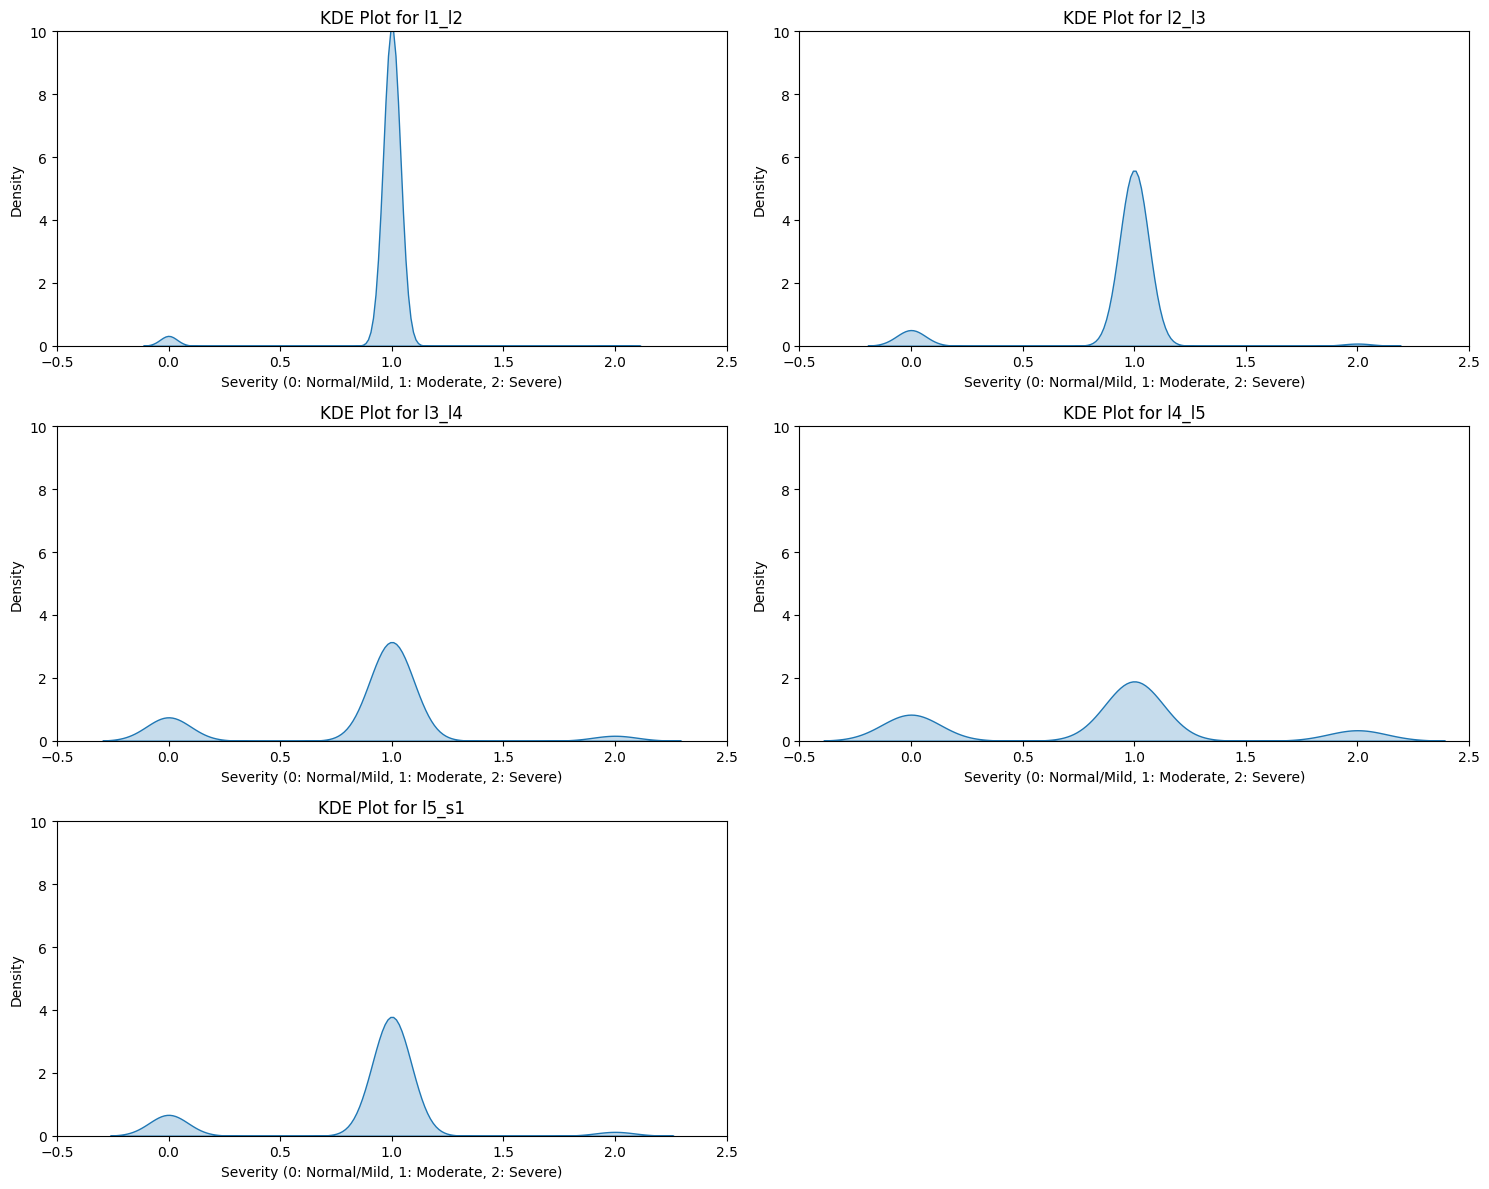

In [280]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

def merge_levels_and_plot_kde(df):
    # Exclude the 'study_id'
    df = df.drop(columns=['study_id'])

    levels = {
        'l1_l2': [
            'spinal_canal_stenosis_l1_l2', 'left_neural_foraminal_narrowing_l1_l2', 
            'right_neural_foraminal_narrowing_l1_l2', 'left_subarticular_stenosis_l1_l2',
            'right_subarticular_stenosis_l1_l2'],
        'l2_l3': [
            'spinal_canal_stenosis_l2_l3', 'left_neural_foraminal_narrowing_l2_l3', 
            'right_neural_foraminal_narrowing_l2_l3', 'left_subarticular_stenosis_l2_l3',
            'right_subarticular_stenosis_l2_l3'],
        'l3_l4': [
            'spinal_canal_stenosis_l3_l4', 'left_neural_foraminal_narrowing_l3_l4', 
            'right_neural_foraminal_narrowing_l3_l4', 'left_subarticular_stenosis_l3_l4',
            'right_subarticular_stenosis_l3_l4'],
        'l4_l5': [
            'spinal_canal_stenosis_l4_l5', 'left_neural_foraminal_narrowing_l4_l5', 
            'right_neural_foraminal_narrowing_l4_l5', 'left_subarticular_stenosis_l4_l5',
            'right_subarticular_stenosis_l4_l5'],
        'l5_s1': [
            'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l5_s1', 
            'right_neural_foraminal_narrowing_l5_s1', 'left_subarticular_stenosis_l5_s1',
            'right_subarticular_stenosis_l5_s1']
    }

    # Merge severity levels for each level across conditions
    merged_data = {}
    for level, cols in levels.items():
        # Use mode to merge levels across all conditions
        merged_data[level] = df[cols].mode(axis=1)[0]

    merged_df = pd.DataFrame(merged_data)

    merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    plt.figure(figsize=(15, 12))
    for i, level in enumerate(merged_df.columns, 1):
        plt.subplot(3, 2, i)
        sns.kdeplot(merged_df[level], fill=True)
        
        plt.title(f'KDE Plot for {level}')
        plt.xlabel('Severity (0: Normal/Mild, 1: Moderate, 2: Severe)')
        
        plt.xlim(-0.5, 2.5)  
        plt.ylim(0, 10)
        plt.tight_layout()

  
    plt.show()

merge_levels_and_plot_kde(base_data)


## Sample .dcm images from dataset

DICOM File Metadata:
(0008, 0018): SOP Instance UID = 1009905322.1.5
(0008, 0023): Content Date = 20240503
(0008, 0033): Content Time = 223751.989806
(0008, 103e): Series Description = T2
(0010, 0020): Patient ID = 1009905322
(0018, 0050): Slice Thickness = 5
(0018, 0088): Spacing Between Slices = 6
(0018, 5100): Patient Position = HFS
(0020, 000d): Study Instance UID = 1009905322
(0020, 000e): Series Instance UID = 1009905322.1243755365
(0020, 0013): Instance Number = 5
(0020, 0032): Image Position (Patient) = [15.0146788634778, -104.95574051141, 102.816122377182]
(0020, 0037): Image Orientation (Patient) = [0, 1, 0, 0.03795679286122, 0, -0.9992793798446]
(0020, 0052): Frame of Reference UID = 1.2.826.0.1.3680043.8.498.12681831529434131380892532075082661240
(0020, 1041): Slice Location = 23.9999990134287
(0028, 0002): Samples per Pixel = 1
(0028, 0004): Photometric Interpretation = MONOCHROME2
(0028, 0010): Rows = 224
(0028, 0011): Columns = 224
(0028, 0030): Pixel Spacing = [1.176470

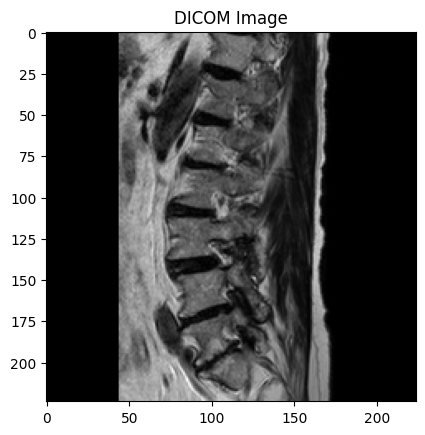

In [281]:
dcm_file_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/1009905322/1243755365/5.dcm'

dcm_data = pydicom.dcmread(dcm_file_path)

print("DICOM File Metadata:")
for elem in dcm_data.iterall():
    if elem.tag != 'PixelData':
        print(f"{elem.tag}: {elem.name} = {elem.value}")


if 'PixelData' in dcm_data:
    plt.imshow(dcm_data.pixel_array, cmap='gray')
    plt.title('DICOM Image')
    plt.show()
else:
    print("No image data found in the DICOM file.")

In [282]:
def count_dcm_files_with_progress(root_dir):
    all_files = glob.glob(os.path.join(root_dir, '**', '*'), recursive=True)
    
    dcm_files = [f for f in all_files if f.endswith('.dcm')]
    
    return len(dcm_files)

path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

print("Counting .dcm files...")
dcm_count = count_dcm_files_with_progress(path)
print(f"Total .dcm files: {dcm_count}")

Counting .dcm files...
Total .dcm files: 147218


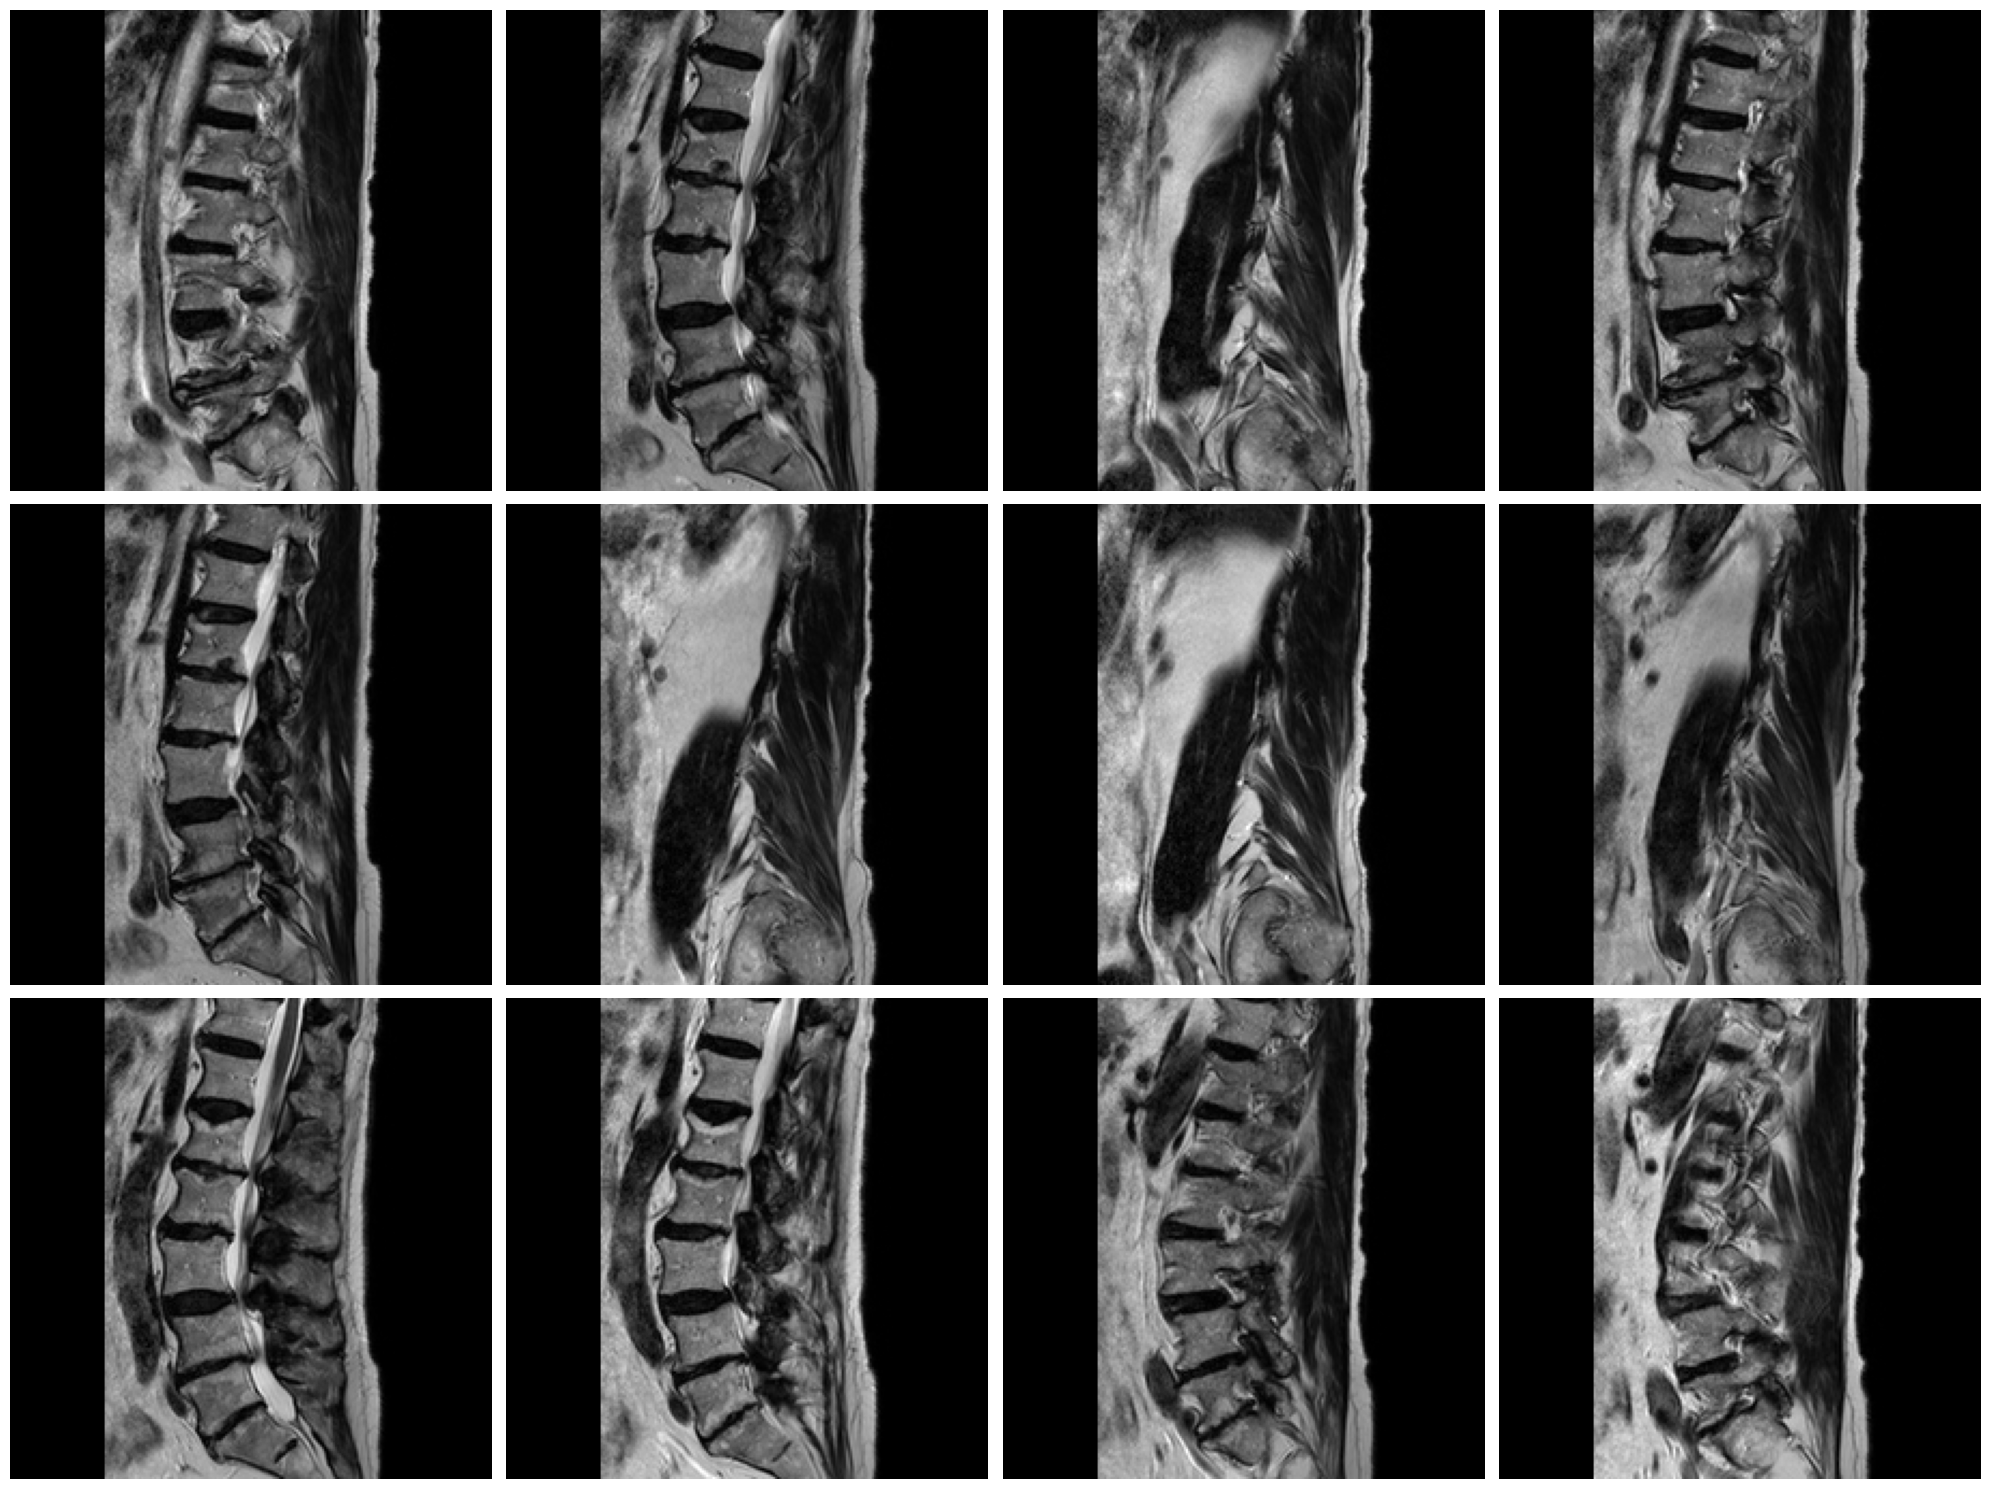

In [284]:
# Some MRI images(.dcm) of LumberSpine of a patient without it's Metadata(info.)

folder_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/1009905322/1243755365/'

dicom_files = [f for f in os.listdir(folder_path) if f.endswith('.dcm')]

plt.figure(figsize=(20, 15)) 
for i, dicom_file in enumerate(dicom_files[:12]):
    dcm_file_path = os.path.join(folder_path, dicom_file)

    dcm_data = pydicom.dcmread(dcm_file_path)

    if 'PixelData' in dcm_data:
        plt.subplot(3, 4, i+1) # 3 rows * 4 subplots in each row
        plt.imshow(dcm_data.pixel_array, cmap='gray')
        plt.axis('off')

plt.tight_layout()
plt.show()